 # sprint3-ml-scratch-logistic-regression

 ## 前提知識の説明

## ロジスティック回帰とは

分類問題で使用するモデルで非常に実装しやすいものの、高い性能が発揮されるのは線形分離可能なクラスに対してのみ。  
ロジスティック回帰は産業界において最も広く使用されている分類のアルゴリズムの一つ。

## 交差エントロピー誤差関数とは

線形回帰では、二乗誤差関数をコスト関数に使用しますが、ロジスティック回帰で２値分類を行うときに使うコスト関数が、以下の交差エントロピー誤差関数です。

 $
 \displaystyle J(\theta) = \frac{1}{m} \sum_{i=1}^m [-y^{(i)} \log(h_{\theta}(x^{(i)})) - (1-y^{(i)}) \log(1-h_{\theta}(x^{(i)}))]
 $

## データ・セットの用意

## ２値分類

## EDA

今回は与えられたデータセットを以下の二種の異なるアヤメに分類する分類問題です。

- Iris-versicolor
- Iris-virginica

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy.random import*
import warnings
warnings.filterwarnings('ignore')

In [31]:
# データセットをダウンロード
train_df = pd.read_csv("iris/Iris.csv")

In [32]:
train_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


データセットは150行で、特徴量は５です。欠損値はありません。

In [33]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


今回のラベル値のSpeciesの各値をカウントしましょう。3種類のアヤメは50行ずつ数値データが割り当てられています。

In [34]:
train_df["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

Speciesごとに色分けして散布図にプロットします。

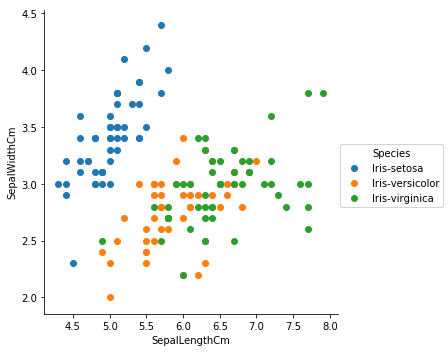

In [35]:
sns.FacetGrid(train_df,hue='Species',size=5).map(plt.scatter,'SepalLengthCm','SepalWidthCm')\
         .add_legend()

箱ひげ図で三種類のアヤメのPetalLengthCmをy軸にプロットして、違いがどのように現れるか確認します。今回分類する二種のアヤメの間には、一部の領域に重複が見られます。

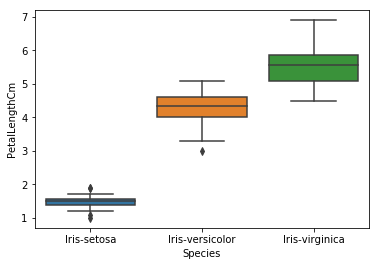

In [36]:
sns.boxplot(x='Species',y='PetalLengthCm',data=train_df)

pairplotで三種のアヤメの全ての特徴量との相関をみます。
ここでもsetosaは他の二種と分類されて表示され、今回分類するversicolorとvirginicaは一部重なっていることがわかります。

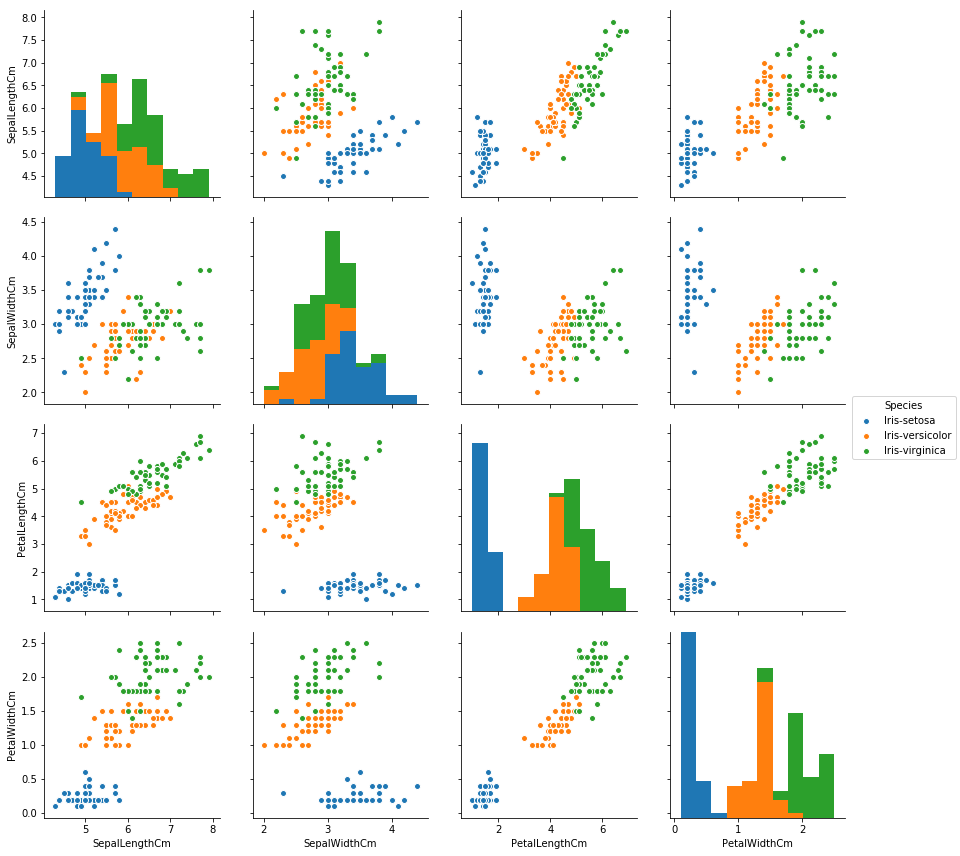

In [37]:
sns.pairplot(train_df.drop('Id',axis=1),hue='Species',size=3)

データセットから'Iris-setosa'を含む行を削除し、特徴量（説明変数）のみに分割します。

In [38]:
train_df=train_df[train_df['Species']!='Iris-setosa']
# カラム'Id','Species'を削除
X=train_df.drop(['Id','Species'],axis=1)
X=np.array(X.reset_index(drop=True))
# コスト関数の定数項用のカラムを増やす
X=pd.DataFrame(np.insert(X,0,1,axis=1))

In [39]:
X=X.rename(columns={1:"SepalLengthCm",2:"SepalWidthCm",3:"PetalLengthCm",4:"PetalWidthCm"})
X.head()

,0,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1.0,7.0,3.2,4.7,1.4
1,1.0,6.4,3.2,4.5,1.5
2,1.0,6.9,3.1,4.9,1.5
3,1.0,5.5,2.3,4.0,1.3
4,1.0,6.5,2.8,4.6,1.5


### 目的変数の値をyに入れる
### ラベルデータをone-hot、二値分類のため「Iris-virginica」データを削除する

In [40]:
y = train_df[["Species"]]
y=y.reset_index(drop=True)
y=pd.get_dummies(y["Species"])
y = y.astype('int8')
y = y.reset_index(drop=True)
y = y.drop("Iris-virginica",axis=1)
y.head()

,Iris-versicolor
0,1
1,1
2,1
3,1
4,1


# 数式の実装

##  シグモイド関数

$$ g(z) = \frac{1}{1+e^{−z}}.
$$

In [41]:
def sigmoid(X,theta):
    z=np.dot(X,theta)
    return (1/(1+np.exp(-z)))

        
np.random.seed(seed=10)
theta=np.random.rand(5,1)
s =sigmoid(X,theta)

In [42]:
s.sum()

99.88949840901059

## シグモイド関数の説明
### なぜ、ロジスティック回帰は、線形回帰と異なり出力をシグモイド関数を通して行うか説明せよ。


シグモイド関数の値は0から１の範囲になるため確率と見ることができる。またロジスティック回帰は、サンプルデータがどのクラスに分類されるかを確率として表す。そのため、シグモイド関数を出力に用いる。

## 正則化の説明

ペネルティともいう。

正則化は、パラメータの値を小さくさせる効果をもたらし、その変数の影響を小さくできます。  
モデルが学習する中で、不要なパラメータの影響を小さくすることで、複雑なモデルの過学習を防ぐことが可能になります。  
ただし、パラメータの $θ_{0}$には正則化項は存在しません。  

## ロジスティック回帰における、目的関数（コスト関数）

$
h_θ(x) = g(θ^T x).\\
g(z) = \frac{1}{1+e^{−z}}.\\
J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j.\\
$

###  $θ,λ$の値を設定

In [71]:
def compute_cost(X,y,theta):

    h = sigmoid(X,theta)
    ramda = 0.01
    m = len(X)
    theta[0]=0
    J = (1/m)*(np.dot(-y.T,np.log(h)) - np.dot((1-y).T,np.log(1-h)))+\
                               (ramda/(2*m))*(theta**2).sum()
    return J[0,0]
        
np.random.seed(seed=10)
theta=np.random.rand(5,1)
compute_cost(X,y,theta)

3.9810861431956983

In [62]:
# def compute_cost(X, y, theta):
#     h = sigmoid(X,theta)
#     lambda1=0.01
#     m = len(X)
#     J = (1/m) * (np.dot(-y.T , np.log(h)) - np.dot((1 - y).T , np.log(1-h)) ) \
#              + (lambda1/(2*m)) * ((theta*theta)*pd.DataFrame([0,1,1,1,1])).sum().values

#     return J[0,0]

# np.random.seed(seed=10)
# theta=np.random.rand(5,1)
# compute_cost(X, y,theta)

3.9810861431956983

## 二乗誤差と交差エントロピー誤差

回帰問題では、目的関数により、二つの値の差の総和が小さいほどモデルの精度が高いことになる。  
一方、ロジスティック回帰は回帰問題と同様に各特徴量にパラメータ（重み）をかけて足し合わせた関数を使用するが、全ての和の最大値を考えるのではなく、全ての値の分類の尤もらしさの確率が最大になることを考える。  

そのような各学習データの確率をシグモイド関数の値（０から１までの範囲の値をとるため）で表している。その数値の確率を掛け合わせた同時確率が最大になるようにパラメータを調整し、分類の精度を上げていく。
そのように実装されたものが交差エントロピー関数である。


# テスト

In [64]:
# sigmoid functionテスト
def sigmoid_test(X,theta):
    z=np.dot(X,theta)
    s = (1/(1+np.exp(-z)))
    if s.sum() == 99.88949840901059:
            print("CORRECT")
            return True

    else:
            print("INCORRECT")
            return False
        
np.random.seed(seed=10)
theta=np.random.rand(5,1)
sigmoid_test(X,theta)

CORRECT


True

In [73]:
# コスト関数のテスト
def compute_cost_test(X,y,theta): #コスト関数    
    h = sigmoid(X,theta)
    ramda = 0.01
    m = len(X)
    J = (1/m)*(np.dot(-y.T,np.log(h)) - np.dot((1-y).T,np.log(1-h)))+\
                               (ramda/(2*m))*(theta**2).sum()
    if J[0,0] < 4.0:
        print("CORRECT")
        return True

    else:
        print("INCORRECT")
        return False

np.random.seed(seed=10)
theta=np.random.rand(5,1)
compute_cost_test(X, y,theta)

CORRECT


True

In [182]:
# 最急降下法のテスト
def gradient_descent_test(X, y, theta, iterations=1000, alpha=0.001):
    m = len(X)
    past_costs =[]
    for _  in range(iterations):
        past_costs.append(compute_cost(X, y, theta))
        h_x_y = sigmoid(X , theta) - y
        np_dot = np.dot(X.T , h_x_y)
        ramda=0.01

        theta  -= (alpha/m) * (np_dot + ramda*theta)
    # 最終のコストが0.8未満を合格とする
    if  past_costs[-1]<0.8:
        print("CORRECT")
        return True
    
    else:
        print("INCORRECT")
        return False

np.random.seed(seed=10)
theta=np.random.rand(5,1)
gradient_descent_test(X, y, theta)

CORRECT


True

In [229]:
#予測テスト
def predict_probs_tesxt(X, theta):
    return sigmoid(X, theta)
    
def predict_test(X, theta, threshold=0.5):
    """
    threshold: 閾値
    """""
    theta_x = np.dot(X,theta)
    pred = np.sum((sigmoid(X,theta)>=threshold)[:50])  
    
    if pred>=45 :
        print("CORRECT")
        return True
    else:
        print("INCORRECT")
        return False
    
        

np.random.seed(seed=10)
theta=np.random.rand(5,1)
predict_test(X, theta)

CORRECT


True

### θの初期値をランダムに設定（説明変数４個＋θ０用１個）

## 最急降下法コード

In [236]:
 def gradient_descent(X, y, theta, iterations=1000, alpha=0.01):
    m = len(X)
    past_costs =[]
    for _  in range(iterations):
        past_costs.append(compute_cost(X, y, theta))
        h_x_y = sigmoid(X , theta) - y
        np_dot = np.dot(X.T , h_x_y)
        ramda=0.05

        theta  = theta - (alpha/m) * (np_dot + ramda*theta)
        
    return past_costs ,theta

In [237]:
np.random.seed(seed=10)
theta=np.random.rand(5,1)
cost,theta = gradient_descent(X, y, theta)
cost

[3.9810861431956983,
 3.378175636167431,
 3.1629609419575218,
 2.9489533494216955,
 2.7366791702628706,
 2.5268842786654524,
 2.3206121951972176,
 2.119294816500638,
 1.9248411999086659,
 1.739691155835339,
 1.5667756016262284,
 1.409307993646818,
 1.2703516900068539,
 1.152201941338919,
 1.0557749730171428,
 0.9802962340202745,
 0.9234804193970357,
 0.8821206681510713,
 0.85278804606616,
 0.8323625774406885,
 0.81829467324966,
 0.8086476187175009,
 0.8020208484518728,
 0.7974339131251557,
 0.7942147509783154,
 0.7919087843015755,
 0.7902110570757022,
 0.7889179890967128,
 0.7878940540514628,
 0.7870491610101236,
 0.7863234596081157,
 0.7856771941809604,
 0.785083952326245,
 0.7845261802842155,
 0.783992206426109,
 0.7834742661114683,
 0.782967190860059,
 0.7824675381297386,
 0.7819730133634681,
 0.7814820859717037,
 0.7809937340548486,
 0.7805072746261787,
 0.7800222506445815,
 0.7795383558109656,
 0.7790553844786543,
 0.778573198272535,
 0.778091703829633,
 0.7776108379454492,
 0.777

## プロット

In [238]:
def cost_plot(costs):
        plt.figure(figsize=(12,8))
        plt.title("Cost Function J")

        # Plot lines
        plt.xlabel('No. of iterations')
        plt.ylabel('Cost')
        plt.legend()
        plt.plot(costs)
        # Visualize
#cost_plot(cost)

No handles with labels found to put in legend.


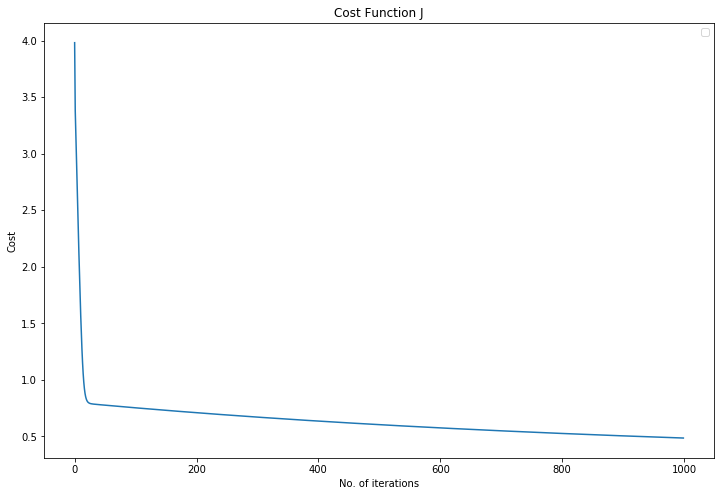

In [239]:
cost_plot(cost)

### 予測関数

In [240]:
# 確率を求める
def predict_probs(X, theta):
    return sigmoid(X, theta)
    
    
# 分類を行う。
def predict(X, theta, threshold=0.5):
    """
    threshold: 閾値
    """""
    theta_x = np.dot(X,theta)
    pred = np.sum((sigmoid(X,theta)>=threshold)[:50])  
    
    return pred
    

以下はモデルの精度です(%)。

In [241]:
# 正解数
predict(X, theta, threshold=0.5)

46

In [242]:
print('正解率'+str(100*(predict(X, theta, threshold=0.5))/50) +'%')

正解率92.0%
